In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [131]:
#https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

In [132]:
df = pd.read_csv("Student_Performance.csv")

In [133]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [135]:
df["Extracurricular Activities"] = np.where(df["Extracurricular Activities"].str.contains("Yes"), 1, 0)

In [136]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


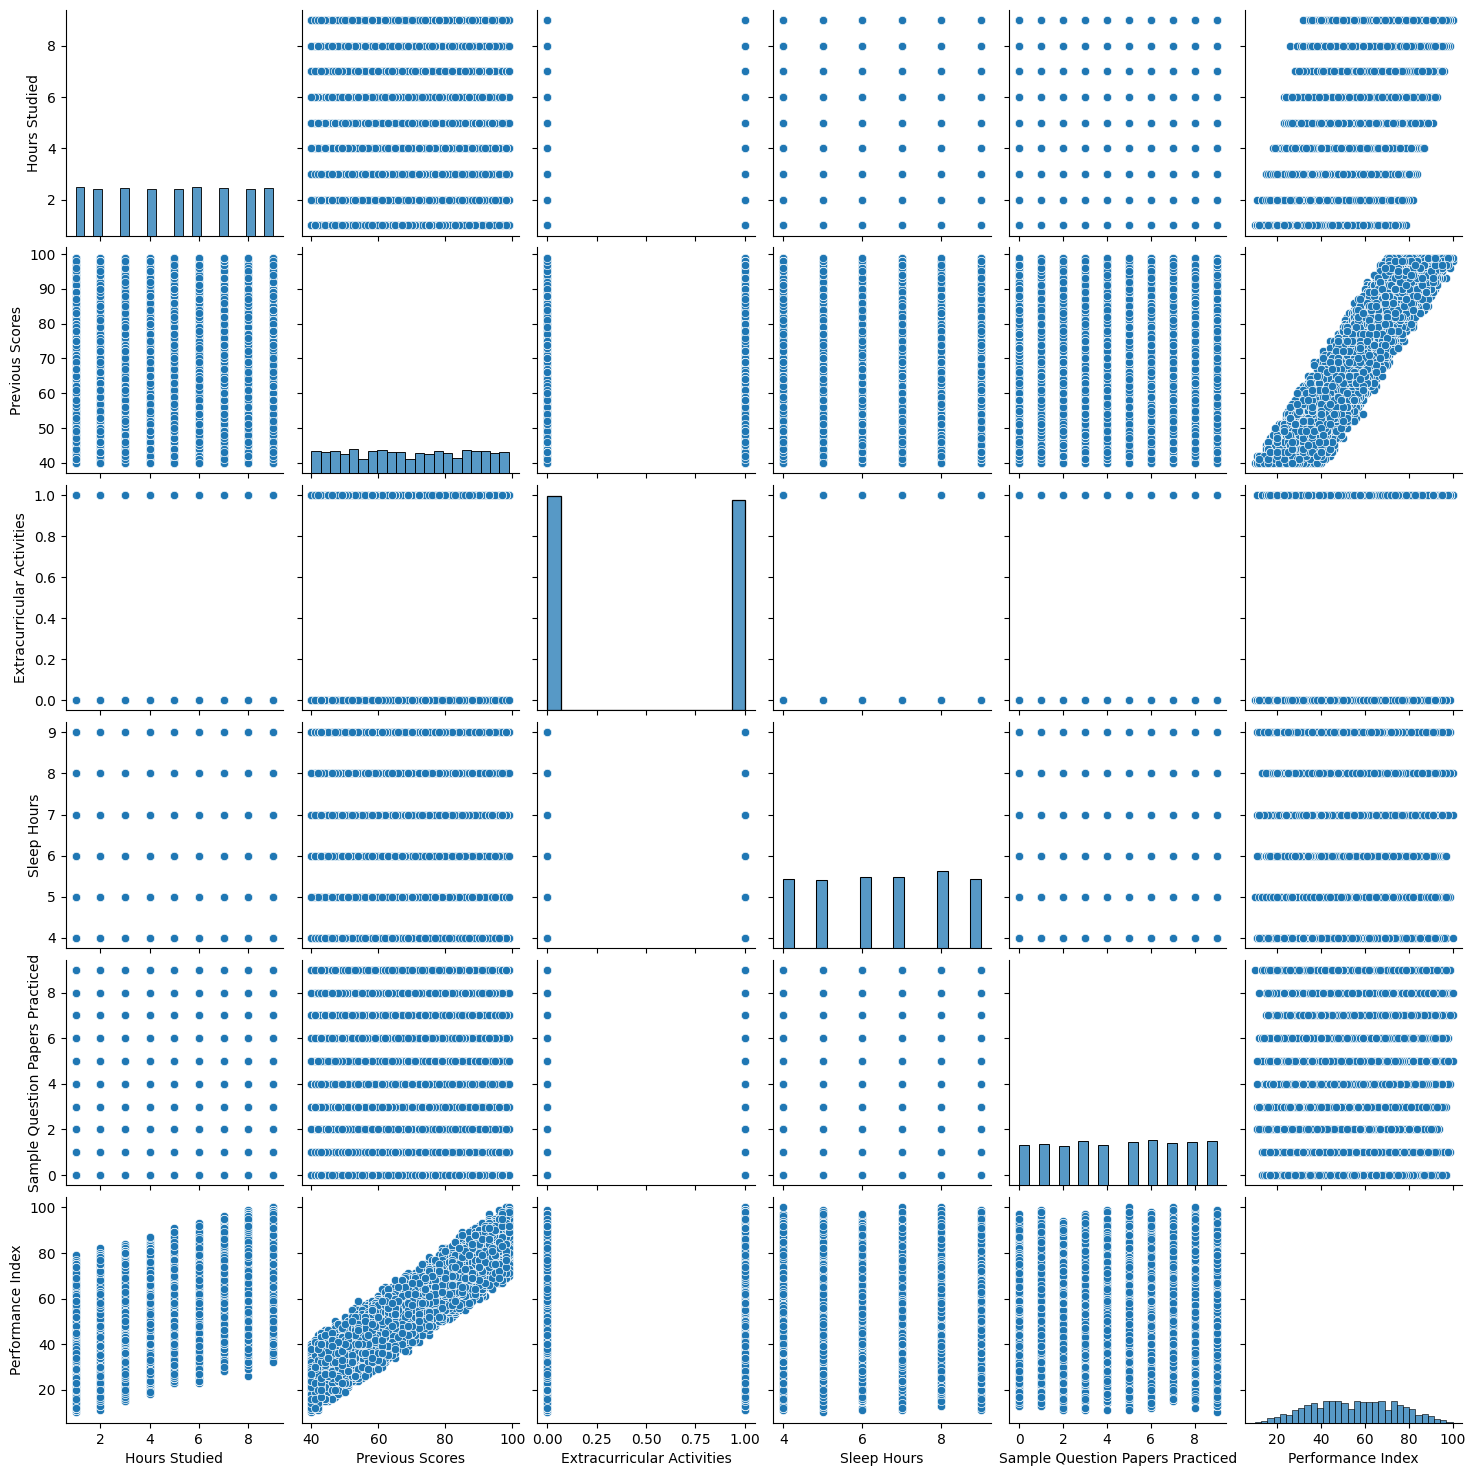

In [137]:
sns.pairplot(df)

plt.show()

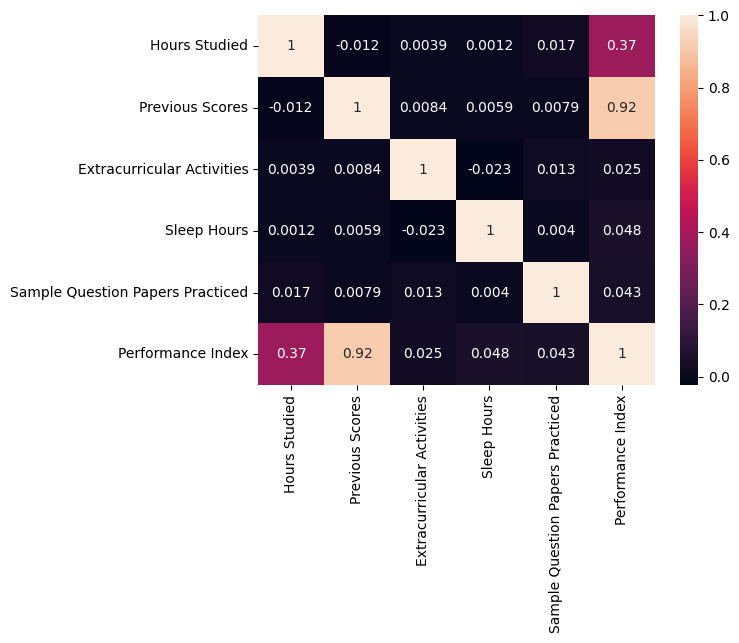

In [138]:
sns.heatmap(df.corr(), annot=True)

plt.show()

In [139]:
#Building the Model - Decision Tree Regressor

In [140]:
X = df.drop("Performance Index", axis=1)

y = df["Performance Index"]

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [143]:
param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_features": ["sqrt", "log2"],
    "max_depth": [3,5,7,9,10,12,15]
}

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), cv=5, scoring="accuracy", n_jobs=-1, param_grid=param_grid)

In [145]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [146]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [147]:
y_pred = grid.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [149]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.7308320204857339
MAE: 8.196244396508018
MSE: 99.60822773016609


In [166]:
#R2 = 0.73, 73% Accuracy

In [151]:
#Let's visualize the tree and see if everything is looking okay

In [152]:
from sklearn import tree

In [153]:
tree_model = DecisionTreeRegressor(criterion="squared_error", max_depth=3, max_features="sqrt", splitter="best")

[Text(0.5, 0.875, 'Hours Studied <= 4.5\nsquared_error = 368.566\nsamples = 7000\nvalue = 55.4'),
 Text(0.25, 0.625, 'Sample Question Papers Practiced <= 7.5\nsquared_error = 325.958\nsamples = 3120\nvalue = 48.293'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Previous Scores <= 71.5\nsquared_error = 328.714\nsamples = 2452\nvalue = 47.84'),
 Text(0.0625, 0.125, 'squared_error = 101.731\nsamples = 1334\nvalue = 33.743'),
 Text(0.1875, 0.125, 'squared_error = 79.511\nsamples = 1118\nvalue = 64.66'),
 Text(0.375, 0.375, 'Sample Question Papers Practiced <= 8.5\nsquared_error = 312.324\nsamples = 668\nvalue = 49.955'),
 Text(0.3125, 0.125, 'squared_error = 311.977\nsamples = 326\nvalue = 49.699'),
 Text(0.4375, 0.125, 'squared_error = 312.534\nsamples = 342\nvalue = 50.199'),
 Text(0.75, 0.625, 'Previous Scores <= 70.5\nsquared_error = 329.551\nsamples = 3880\nvalue = 61.115'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Previous Scores <= 55.5\nsquared_error = 98.907\nsam

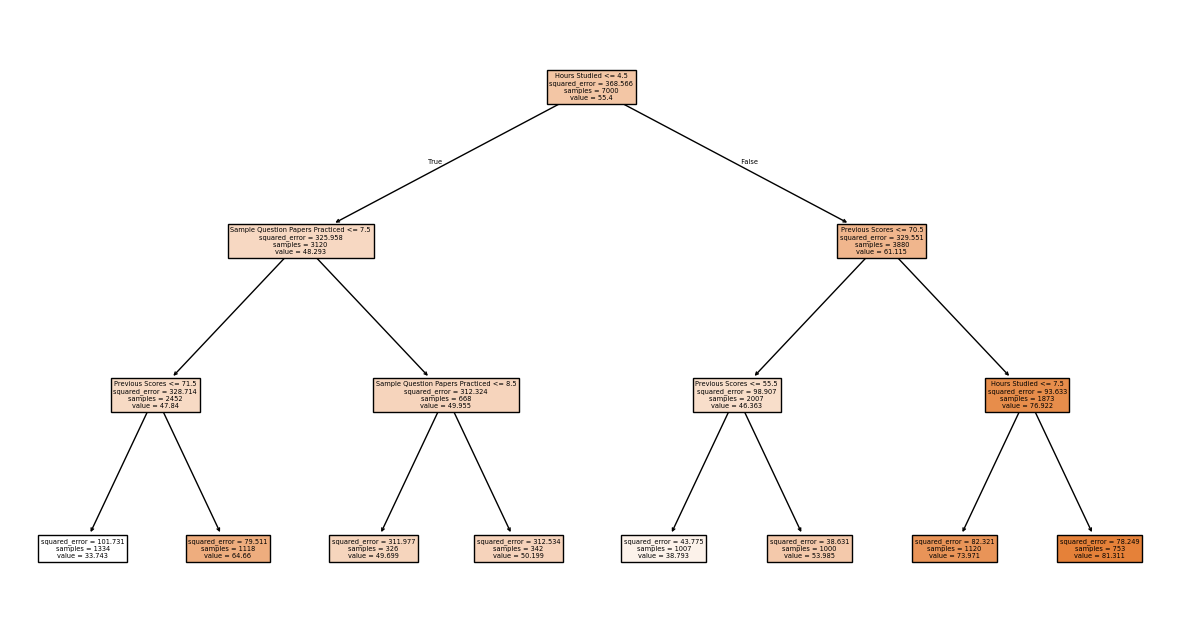

In [154]:
plt.figure(figsize=(15,8))

tree.plot_tree(tree_model.fit(X_train, y_train), feature_names=X_train.columns, filled=True)

In [155]:
#Maybe we pruned so much. We see high number of samples in the leaf nodes. Let's try a max depth of 4 and see if we can get higher R2 score.

R2 Score: 0.9277062622781332
MAE: 4.204601369851277
MSE: 26.753000499760187


[Text(0.5, 0.9, 'Previous Scores <= 69.5\nsquared_error = 368.566\nsamples = 7000\nvalue = 55.4'),
 Text(0.25, 0.7, 'Previous Scores <= 55.5\nsquared_error = 133.282\nsamples = 3500\nvalue = 40.099'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Hours Studied <= 4.5\nsquared_error = 82.23\nsamples = 1833\nvalue = 32.955'),
 Text(0.0625, 0.3, 'Sample Question Papers Practiced <= 3.5\nsquared_error = 36.882\nsamples = 826\nvalue = 25.837'),
 Text(0.03125, 0.1, 'squared_error = 34.033\nsamples = 319\nvalue = 25.041'),
 Text(0.09375, 0.1, 'squared_error = 38.026\nsamples = 507\nvalue = 26.337'),
 Text(0.1875, 0.3, 'Previous Scores <= 47.5\nsquared_error = 43.775\nsamples = 1007\nvalue = 38.793'),
 Text(0.15625, 0.1, 'squared_error = 26.41\nsamples = 518\nvalue = 34.795'),
 Text(0.21875, 0.1, 'squared_error = 27.3\nsamples = 489\nvalue = 43.029'),
 Text(0.375, 0.5, 'Previous Scores <= 62.5\nsquared_error = 71.586\nsamples = 1667\nvalue = 47.954'),
 Text(0.3125, 0.3, 'Hours Studied <= 4.5

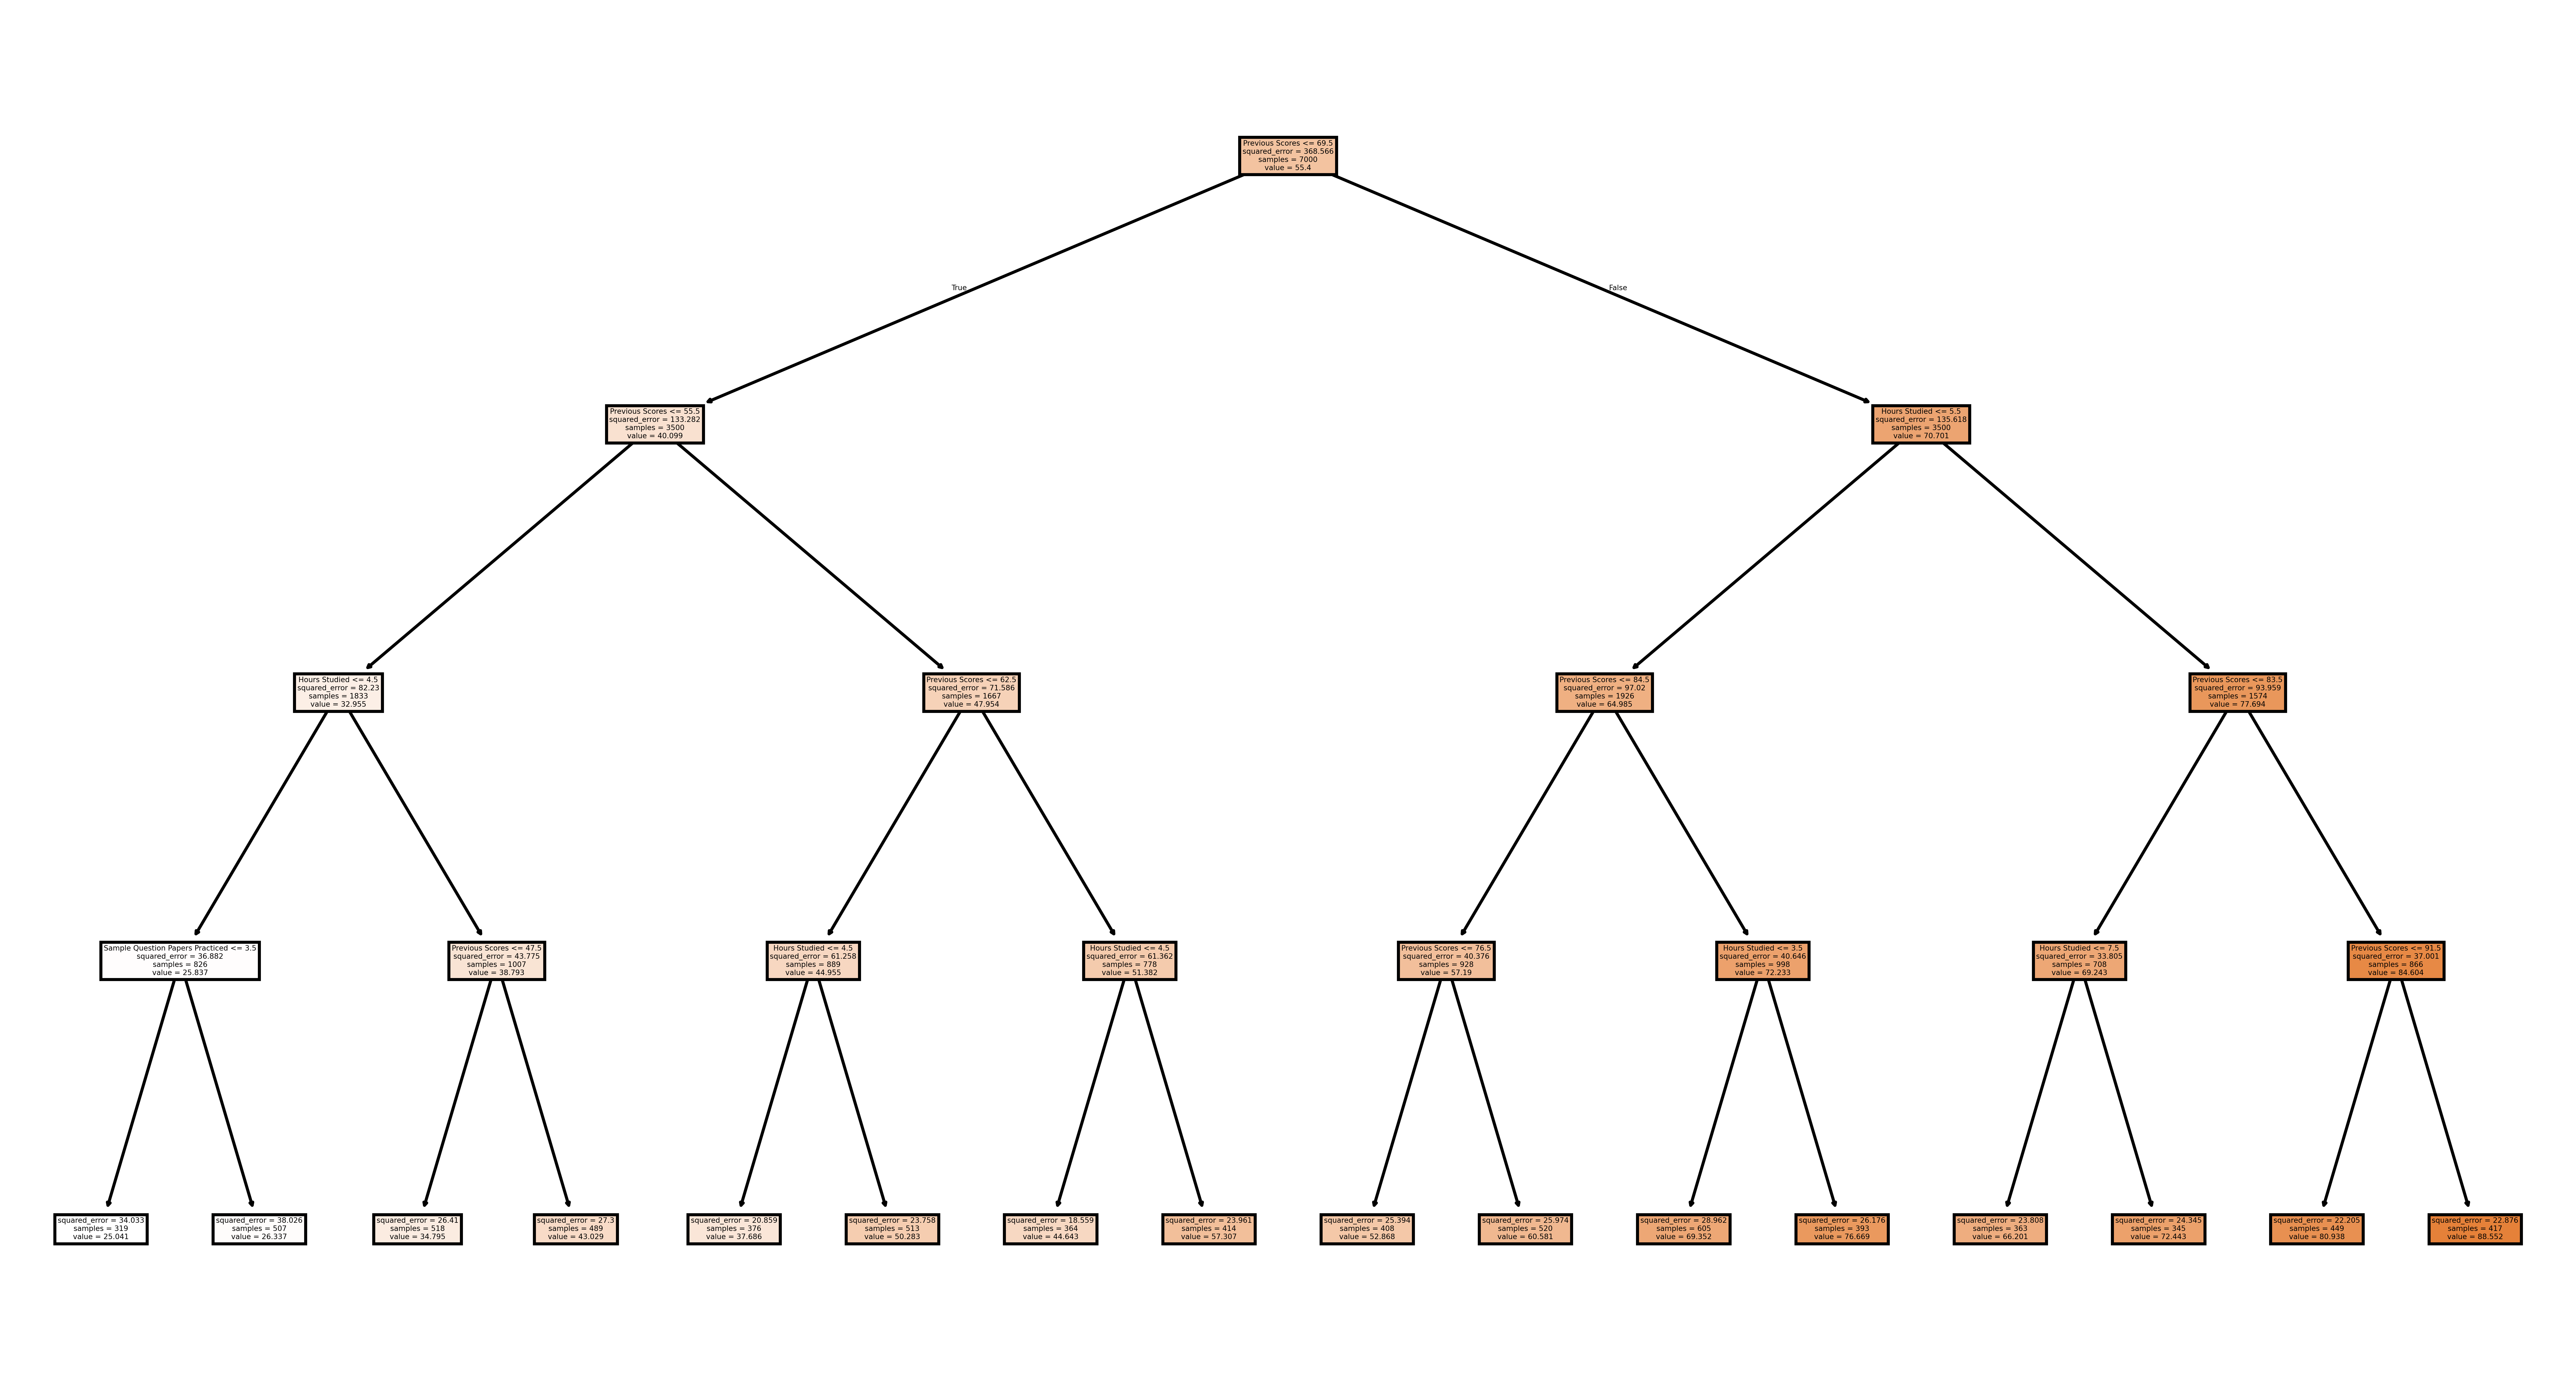

In [167]:
tree_model = DecisionTreeRegressor(criterion="squared_error", max_features="sqrt", random_state=42, max_depth=4, splitter="best")

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(15, 8), dpi=800)

tree.plot_tree(tree_model.fit(X_train, y_train), feature_names=X_train.columns, filled=True)

In [157]:
#We have now achieved an R2 score of 0.93, so 93%.

In [158]:
#We have also seen greater optimization in our MSE and MAE metrics.

In [159]:
#It appears that these hyperparameters, along with a max depth of 4 is the most ideal Decision Tree Regressor model we can build.

In [160]:
#As an extra, let's just simply create a linear regression model to compare both models' performances.

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9890110607021136
MAE: 1.6090437564045241
MSE: 4.066563824092691


In [163]:
#0.99 R2 score, without a single tuning! That just goes to show how optimized the dataset is for the Linear Regression Model.

In [164]:
#Decision trees are great, but no model is a one fit solution to everything.

In [165]:
import warnings

warnings.filterwarnings("ignore")